# U.S. Medical Insurance Costs

## Scope of the Project

This project aims at analyzing a [Kaggle dataset](https://www.kaggle.com/mirichoi0218/insurance) containing information regarding the costs of insurance for various people in various parts of the United States. In what follows, I aim at:

1. analyzing the available data, providing basic information concerning percentages and distribution;
2. answering questions about how sex and geographical context may affect one's lifestyle and insurance costs.

An immediately evident challenge for this project is the complexity of the data and the mulltiple factors that affect the costs of insurance; **how can I examine the impact of a single variable (say, sex or geographical location) without taking into account everything else?**

### Importing the dataset into Python

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.read_csv("insurance.csv")
print(df.head())
df.head()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Preliminary analysis of the dataset

I will start by creating different arrays for the numerical values in the dataset:

1. age
2. BMI
3. number of children
4. insurance charges.

In [2]:
age = df["age"]

bmi = df["bmi"]
children = df["children"]

charges = df["charges"]

Now I will analyze some of this data, starting with the numerical values (charges, age, bmi, number of children).


 **Individual medical costs billed by health insurance**
 
        The mean of this array is 13270.422265141257.
        This is the five-number summary for this array:
            - sample minimum: 1121.8739,
            - first quartile: 4740.28715,
            - median: 9382.033,
            - third quartile: 16639.912515,
            - sample maximum: 63770.42801.
        The interquartile range for this array is 11899.625365.
        The standard deviation is 12105.484975561612.
        The variance is 146542766.49354792.
        


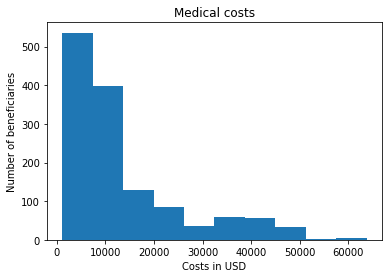


 **Age of primary beneficiary** 
 
        The mean of this array is 39.20702541106129.
        This is the five-number summary for this array:
            - sample minimum: 18,
            - first quartile: 27.0,
            - median: 39.0,
            - third quartile: 51.0,
            - sample maximum: 64.
        The interquartile range for this array is 24.0.
        The standard deviation is 14.044709038954522.
        The variance is 197.2538519888909.
        


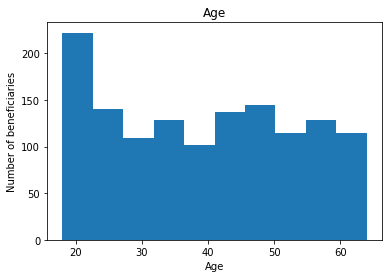

In [3]:
def essential_array_analysis(array):
    return (
        """
        The mean of this array is {mean}.
        This is the five-number summary for this array:
            - sample minimum: {sample_minimum},
            - first quartile: {first_quartile},
            - median: {median},
            - third quartile: {third_quartile},
            - sample maximum: {sample_maximum}.
        The interquartile range for this array is {interquartile_range}.
        The standard deviation is {standard_deviation}.
        The variance is {variance}.
        """.format(
        mean = np.mean(array),
        sample_minimum = min(array),
        first_quartile = np.percentile(array, 25),
        median = np.median(array),
        third_quartile = np.percentile(array, 75),
        sample_maximum = max(array),
        interquartile_range = (np.percentile(array, 75) - np.percentile(array, 25)),
        standard_deviation = np.std(array),
        variance = np.var(array)
        ))

print("\n **Individual medical costs billed by health insurance**\n", essential_array_analysis(charges))
plt.hist(charges)
plt.title("Medical costs")
plt.xlabel("Costs in USD")
plt.ylabel("Number of beneficiaries")
plt.show()
print("\n **Age of primary beneficiary** \n", essential_array_analysis(age))
plt.hist(age)
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Number of beneficiaries")
plt.show()


 **Body mass index** 
 
        The mean of this array is 30.66339686098655.
        This is the five-number summary for this array:
            - sample minimum: 15.96,
            - first quartile: 26.29625,
            - median: 30.4,
            - third quartile: 34.69375,
            - sample maximum: 53.13.
        The interquartile range for this array is 8.3975.
        The standard deviation is 6.0959076415894256.
        The variance is 37.16008997478835.
        


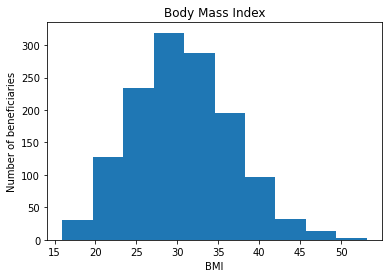


 **Number of children** 
 
        The mean of this array is 1.0949177877429.
        This is the five-number summary for this array:
            - sample minimum: 0,
            - first quartile: 0.0,
            - median: 1.0,
            - third quartile: 2.0,
            - sample maximum: 5.
        The interquartile range for this array is 2.0.
        The standard deviation is 1.2050421724928497.
        The variance is 1.452126637486287.
        


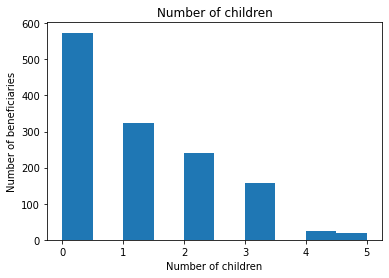

In [4]:
print("\n **Body mass index** \n", essential_array_analysis(bmi))
plt.hist(bmi)
plt.title("Body Mass Index")
plt.xlabel("BMI")
plt.ylabel("Number of beneficiaries")
plt.show()
print("\n **Number of children** \n", essential_array_analysis(children))
plt.hist(children)
plt.title("Number of children")
plt.xlabel("Number of children")
plt.ylabel("Number of beneficiaries")
plt.show()

Now I will analyze the categorical values in the dataset (smokers and non-smokers, region of provenance, sex).

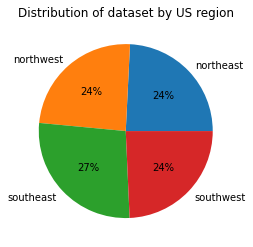

      region  beneficiaries  percentage
0  northeast            324   24.215247
1  northwest            325   24.289985
2  southeast            364   27.204783
3  southwest            325   24.289985


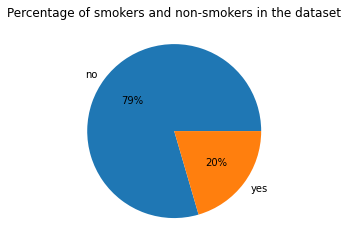

  smoker  beneficiaries  percentage
0     no           1064   79.521674
1    yes            274   20.478326


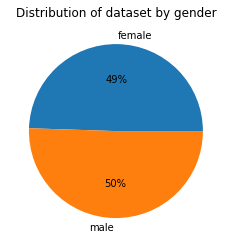

      sex  beneficiaries  percentage
0  female            662   49.476831
1    male            676   50.523169


In [5]:
category = lambda category: \
    df.rename(columns = {"charges": "beneficiaries"}).groupby(category).beneficiaries.count().reset_index()
region = category("region")
plt.pie(region["beneficiaries"], labels = region["region"], autopct = "%d%%")
plt.title("Distribution of dataset by US region")
plt.show()
perc_column = lambda perc_column: (perc_column["beneficiaries"] / df["charges"].count()) * 100
region["percentage"] = perc_column(region)
print(region)
smoker = category("smoker")
plt.pie(smoker["beneficiaries"], labels = smoker["smoker"], autopct = "%d%%")
plt.title("Percentage of smokers and non-smokers in the dataset")
plt.show()
smoker["percentage"] = perc_column(smoker)
print(smoker)
sex = category("sex")
plt.pie(sex["beneficiaries"], labels = sex["sex"], autopct = "%d%%")
plt.title("Distribution of dataset by gender")
plt.show()
sex["percentage"] = perc_column(sex)
print(sex)

### Adding a column for insurance costs tiers
The insurance costs in this dataset tend to be under \\$10,000; few go above \\$15,000; a minimal percentage goes above \\$50,000. To facilitate the next steps of the analysis, I will add another column where the insurance costs are categorized into four tiers:
- below \\$5,000: **low**;
- between \\$5,000 and \\$15,000: **medium**;
- above \\$15,000: **high**.

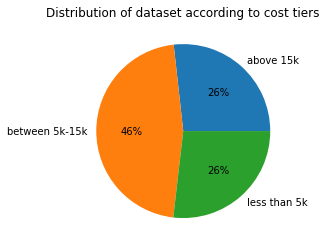

,age,sex,bmi,children,smoker,region,charges,cost tier
0,19,female,27.900,0,yes,southwest,16884.92400,above 15k
1,18,male,33.770,1,no,southeast,1725.55230,less than 5k
2,28,male,33.000,3,no,southeast,4449.46200,less than 5k
3,33,male,22.705,0,no,northwest,21984.47061,above 15k
4,32,male,28.880,0,no,northwest,3866.85520,less than 5k


In [6]:
df["cost tier"] = df.apply(
    lambda row: "less than 5k" if row["charges"] < 5000 else 
    ("between 5k-15k" if row["charges"] >= 5000 and row["charges"] < 15000 else
    "above 15k"), axis = 1)

tier = category("cost tier")
plt.pie(tier["beneficiaries"], labels = tier["cost tier"], autopct = "%d%%")
plt.title("Distribution of dataset according to cost tiers")
plt.show()
df.head()

### Adding a column for categorical BMI scores
To simplify later stages of the analysis, I will add a column that specifies whether a person's weight is considered underweight, normal, or overweight, following the guidelines specified by the [National Institute of Health](https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm):
    - Underweight = < 18.5;
    - Normal weight = 18.5–24.9;
    - Overweight = above 25.

  bmi category  beneficiaries
0       normal            225
1        obese            707
2   overweight            386
3  underweight             20


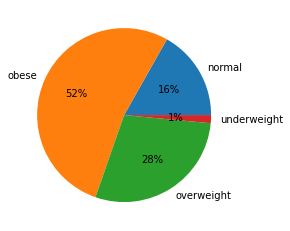

In [72]:
df["bmi category"] = df.apply(
    lambda row: "underweight" if row.bmi < 18.5 else (
        "normal" if row.bmi >= 18.5 and row.bmi < 25 else (
        "overweight" if row.bmi >= 25 and row.bmi < 30 else "obese")), axis = 1)
bmi_categories = category("bmi category")
print(bmi_categories)
plt.pie(bmi_categories["beneficiaries"], labels = bmi_categories["bmi category"], autopct = "%d%%")
plt.label("Distribution of BMI categories in the dataset")
plt.show()

### Additional tables
I will now create additional tables where the data is rearranged according to two particular categories: gender and geographical provenance.

#### Analysis on the basis of gender
I will start with insurance costs.


**Costs for male beneficiaries**
 
        The mean of this array is 13956.751177721893.
        This is the five-number summary for this array:
            - sample minimum: 1121.8739,
            - first quartile: 4619.134,
            - median: 9369.61575,
            - third quartile: 18989.59025,
            - sample maximum: 62592.87309.
        The interquartile range for this array is 14370.456250000001.
        The standard deviation is 12961.428410257226.
        The variance is 167998626.43422315.
        

**Costs for female beneficiaries**
 
        The mean of this array is 12569.578843835347.
        This is the five-number summary for this array:
            - sample minimum: 1607.5101,
            - first quartile: 4885.1587,
            - median: 9412.9625,
            - third quartile: 14454.691825,
            - sample maximum: 63770.42801.
        The interquartile range for this array is 9569.533125.
        The standard deviation is 11120.29525887552.
        Th

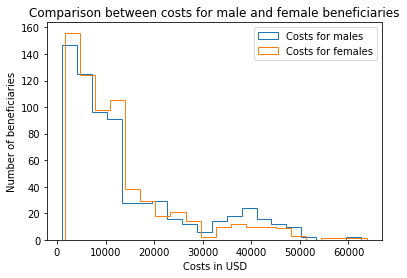

In [7]:
male_costs = df[df.sex == "male"]["charges"]
print("\n**Costs for male beneficiaries**\n", essential_array_analysis(male_costs))
female_costs = df[df.sex == "female"]["charges"]
print("\n**Costs for female beneficiaries**\n", essential_array_analysis(female_costs))
plt.hist(male_costs, bins=20, histtype="step")
plt.hist(female_costs, bins=20, histtype="step")
plt.title("Comparison between costs for male and female beneficiaries")
plt.xlabel("Costs in USD")
plt.ylabel("Number of beneficiaries")
plt.legend(["Costs for males", "Costs for females"])
plt.show()

The two groups have slightly different means: 12569.57 for women, 13956.75 for men. Can we say that this difference is statistically significant? I will perform a Two-Sample T-Test to verify this hypothesis.

In [8]:
def perform_2sample_ttest(group1, group2):
    pval = ttest_ind(group1, group2)[1]
    print("There is a {:.2%} probability that the two groups belong to a population with the same average.".format(pval))
    print("The difference is {maybe}statistically significant.".format(maybe = "" if pval < 0.05 else "not "))
    return pval

pval_sex_costs = perform_2sample_ttest(male_costs, female_costs)

There is a 3.61% probability that the two groups belong to a population with the same average.
The difference is statistically significant.


So, men tend to pay higher insurance costs than women in this dataset. What might be the reason for this difference? Do the men in this dataset tend to smoke more than women? To have higher BMIs? To be older? To have more children? 

Let's start with the age difference. If there is a statistically significant difference in the age distribution for these two groups, then the disparity in costs would be less impressive.


**Age distribution for men in the dataset**
 
        The mean of this array is 38.917159763313606.
        This is the five-number summary for this array:
            - sample minimum: 18,
            - first quartile: 26.0,
            - median: 39.0,
            - third quartile: 51.0,
            - sample maximum: 64.
        The interquartile range for this array is 25.0.
        The standard deviation is 14.039744985943786.
        The variance is 197.11443927033366.
        

**Age distribution for women in the dataset**
 
        The mean of this array is 39.503021148036254.
        This is the five-number summary for this array:
            - sample minimum: 18,
            - first quartile: 27.0,
            - median: 40.0,
            - third quartile: 51.75,
            - sample maximum: 64.
        The interquartile range for this array is 24.75.
        The standard deviation is 14.043603545398817.
        The variance is 197.22280054033823.
        
There is a 44.59% pr

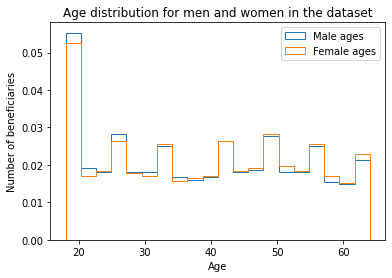

In [9]:
male_age = df[df.sex == "male"]["age"]
print("\n**Age distribution for men in the dataset**\n", essential_array_analysis(male_age))
female_age = df[df.sex == "female"]["age"]
print("\n**Age distribution for women in the dataset**\n", essential_array_analysis(female_age))
pval_sex_age = perform_2sample_ttest(male_age, female_age)
plt.hist(male_age, bins=20, histtype="step", density=True)
plt.hist(female_age, bins=20, histtype="step", density=True)
plt.title("Age distribution for men and women in the dataset")
plt.legend(["Male ages", "Female ages"])
plt.xlabel("Age")
plt.ylabel("Number of beneficiaries")
plt.show()

So, the ages for the two groups are roughly the same; the differences between the two datasets from this standpoint do not appear to be statistically significant. What about the BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index))?


**Distribution of BMI values for men in the dataset**
 
        The mean of this array is 30.943128698224854.
        This is the five-number summary for this array:
            - sample minimum: 15.96,
            - first quartile: 26.41,
            - median: 30.6875,
            - third quartile: 34.9925,
            - sample maximum: 53.13.
        The interquartile range for this array is 8.5825.
        The standard deviation is 6.13589119333087.
        The variance is 37.64916073639534.
        

**Distribution of BMI values for women in the dataset**
 
        The mean of this array is 30.37774924471299.
        This is the five-number summary for this array:
            - sample minimum: 16.815,
            - first quartile: 26.125,
            - median: 30.1075,
            - third quartile: 34.31375,
            - sample maximum: 48.07.
        The interquartile range for this array is 8.188749999999999.
        The standard deviation is 6.041454877245921.
        The vari

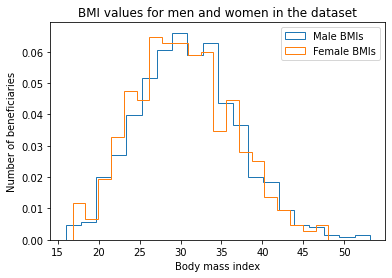

In [10]:
male_bmi = df[df.sex == "male"]["bmi"]
print("\n**Distribution of BMI values for men in the dataset**\n", essential_array_analysis(male_bmi))
female_bmi = df[df.sex == "female"]["bmi"]
print("\n**Distribution of BMI values for women in the dataset**\n", essential_array_analysis(female_bmi))
pval_sex_bmi = perform_2sample_ttest(male_bmi, female_bmi)
plt.hist(male_bmi, bins=20, histtype="step", density=True)
plt.hist(female_bmi, bins=20, histtype="step", density=True)
plt.title("BMI values for men and women in the dataset")
plt.legend(["Male BMIs", "Female BMIs"])
plt.xlabel("Body mass index")
plt.ylabel("Number of beneficiaries")
plt.show()

The difference in the BMI values is little, and does not seem to be statistically significant. What about the percentage of smokers vs. non-smokers?

In [11]:
print(df.head())

   age     sex     bmi  children smoker     region      charges     cost tier
0   19  female  27.900         0    yes  southwest  16884.92400     above 15k
1   18    male  33.770         1     no  southeast   1725.55230  less than 5k
2   28    male  33.000         3     no  southeast   4449.46200  less than 5k
3   33    male  22.705         0     no  northwest  21984.47061     above 15k
4   32    male  28.880         0     no  northwest   3866.85520  less than 5k


smoker     sex   no  yes  percentage
0       female  547  115   17.371601
1         male  517  159   23.520710


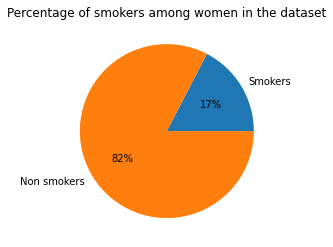

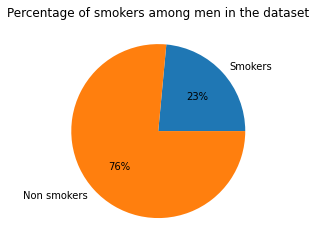

In [12]:
sex_smokers = df.groupby(["sex", "smoker"]).charges.count().reset_index()
sex_smokers = sex_smokers.pivot(index = "sex", columns = "smoker", values = "charges").reset_index()
sex_smokers["percentage"] = (sex_smokers["yes"] / (sex_smokers["no"] + sex_smokers["yes"])) * 100
print(sex_smokers)
plt.pie(sex_smokers.loc[sex_smokers["sex"] == "female", ["yes", "no"]].values.tolist()[0],
       labels = ["Smokers", "Non smokers"], autopct = "%d%%")
plt.title("Percentage of smokers among women in the dataset")
plt.show()
plt.pie(sex_smokers.loc[sex_smokers["sex"] == "male", ["yes", "no"]].values.tolist()[0],
        labels = ["Smokers", "Non smokers"], autopct = "%d%%")
plt.title("Percentage of smokers among men in the dataset")
plt.show()

There seems to be a substantial difference in the ratio of smokers and non smokers between men and women. Is this difference statistically significant? I will perform a Chi Square Test to figure it out.

In [13]:
smoker_sex_contingency = [
    sex_smokers.loc[sex_smokers["sex"] == "male", ["yes", "no"]].values.tolist()[0],
    sex_smokers.loc[sex_smokers["sex"] == "female", ["yes", "no"]].values.tolist()[0]
]

def perform_chi2_test(contingency_table):
    pval = chi2_contingency(contingency_table)[1]
    print("There is a {:.2%} probability that the two groups belong to a population with the same distribution.".format(pval))
    print("The difference is {maybe}statistically significant.".format(maybe = "" if pval < 0.05 else "not "))
    return pval

smoker_sex_pval = perform_chi2_test(smoker_sex_contingency)

There is a 0.65% probability that the two groups belong to a population with the same distribution.
The difference is statistically significant.


So, this seems to be a huge factor and a probable explanation for the difference in insurance costs: in this dataset, men tend to be smokers more than women.
Finally, let us consider the number of children. Is there a difference? Is it statistically significant?


**Number of children for men in the dataset**
 
        The mean of this array is 1.1153846153846154.
        This is the five-number summary for this array:
            - sample minimum: 0,
            - first quartile: 0.0,
            - median: 1.0,
            - third quartile: 2.0,
            - sample maximum: 5.
        The interquartile range for this array is 2.0.
        The standard deviation is 1.2180836632394705.
        The variance is 1.4837278106508875.
        

**Number of children for women in the dataset**
 
        The mean of this array is 1.0740181268882176.
        This is the five-number summary for this array:
            - sample minimum: 0,
            - first quartile: 0.0,
            - median: 1.0,
            - third quartile: 2.0,
            - sample maximum: 5.
        The interquartile range for this array is 2.0.
        The standard deviation is 1.1912147648453721.
        The variance is 1.4189926159856152.
        
There is a 53.05% probability 

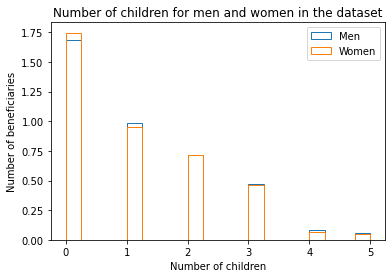

In [14]:
male_children = df[df.sex == "male"]["children"]
print("\n**Number of children for men in the dataset**\n", essential_array_analysis(male_children))
female_children = df[df.sex == "female"]["children"]
print("\n**Number of children for women in the dataset**\n", essential_array_analysis(female_children))
pval_sex_children = perform_2sample_ttest(male_children, female_children)
plt.hist(male_children, bins=20, histtype="step", density=True)
plt.hist(female_children, bins=20, histtype="step", density=True)
plt.title("Number of children for men and women in the dataset")
plt.legend(["Men", "Women"])
plt.xlabel("Number of children")
plt.ylabel("Number of beneficiaries")
plt.show()

#### Analysis on the basis of location
I will now move on to looking at the differences in the dataset according to geographical location. I will start by analyzing the insurance costs in various parts of the country.

In [15]:
print("The regions in the dataset are:", df.region.unique().tolist())
costs_southwest = df[df.region == "southwest"]["charges"]
costs_southeast = df[df.region == "southeast"]["charges"]
costs_northwest = df[df.region == "northwest"]["charges"]
costs_northeast = df[df.region == "northeast"]["charges"]

The regions in the dataset are: ['southwest', 'southeast', 'northwest', 'northeast']



**Insurance costs in the Southwest region**
 
        The mean of this array is 12346.937377292308.
        This is the five-number summary for this array:
            - sample minimum: 1241.565,
            - first quartile: 4751.07,
            - median: 8798.593,
            - third quartile: 13462.52,
            - sample maximum: 52590.82939.
        The interquartile range for this array is 8711.45.
        The standard deviation is 11539.38512699184.
        The variance is 133157409.10904045.
        


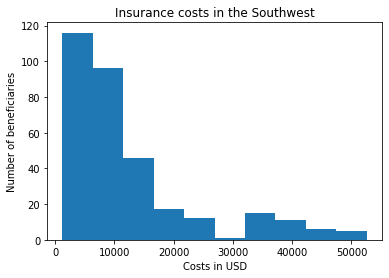


 **Insurance costs in the Southeast region** 
 
        The mean of this array is 14735.411437609888.
        This is the five-number summary for this array:
            - sample minimum: 1121.8739,
            - first quartile: 4440.886200000001,
            - median: 9294.131949999999,
            - third quartile: 19526.2869,
            - sample maximum: 63770.42801.
        The interquartile range for this array is 15085.400699999998.
        The standard deviation is 13951.894320685302.
        The variance is 194655355.13557076.
        


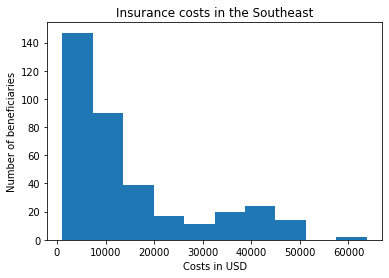

In [16]:
print("\n**Insurance costs in the Southwest region**\n", essential_array_analysis(costs_southwest))
plt.hist(costs_southwest)
plt.title("Insurance costs in the Southwest")
plt.xlabel("Costs in USD")
plt.ylabel("Number of beneficiaries")
plt.show()
print("\n **Insurance costs in the Southeast region** \n", essential_array_analysis(costs_southeast))
plt.hist(costs_southeast)
plt.title("Insurance costs in the Southeast")
plt.xlabel("Costs in USD")
plt.ylabel("Number of beneficiaries")
plt.show()


 **Insurance costs in the Northwest region** 
 
        The mean of this array is 12417.57537396923.
        This is the five-number summary for this array:
            - sample minimum: 1621.3402,
            - first quartile: 4719.73655,
            - median: 8965.79575,
            - third quartile: 14711.7438,
            - sample maximum: 60021.39897.
        The interquartile range for this array is 9992.00725.
        The standard deviation is 11055.229531899642.
        The variance is 122218100.00298598.
        


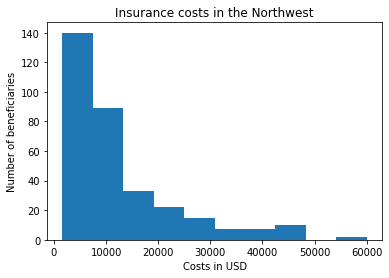


 **Insurance costs in the Northeast region** 
 
        The mean of this array is 13406.384516385804.
        This is the five-number summary for this array:
            - sample minimum: 1694.7964,
            - first quartile: 5194.3222875,
            - median: 10057.652025,
            - third quartile: 16687.3641,
            - sample maximum: 58571.07448.
        The interquartile range for this array is 11493.0418125.
        The standard deviation is 11238.419575566815.
        The variance is 126302074.5564834.
        


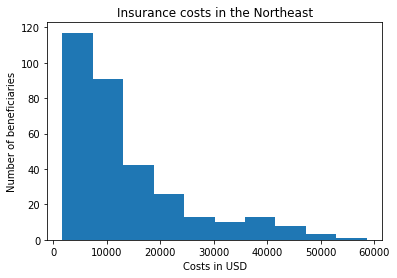

In [17]:
print("\n **Insurance costs in the Northwest region** \n", essential_array_analysis(costs_northwest))
plt.hist(costs_northwest)
plt.title("Insurance costs in the Northwest")
plt.xlabel("Costs in USD")
plt.ylabel("Number of beneficiaries")
plt.show()
print("\n **Insurance costs in the Northeast region** \n", essential_array_analysis(costs_northeast))
plt.hist(costs_northeast)
plt.title("Insurance costs in the Northeast")
plt.xlabel("Costs in USD")
plt.ylabel("Number of beneficiaries")
plt.show()

There seem to be some significant differences in the costs for each region: \\$12346.93 in the SW, \\$14735.41 in the SE, \\$12417.57 in the NW, and \\$13406.38 in the NE.

cost tier     region  above 15k  between 5k-15k  less than 5k
0          northeast         89             156            79
1          northwest         81             157            87
2          southeast        116             143           105
3          southwest         72             165            88


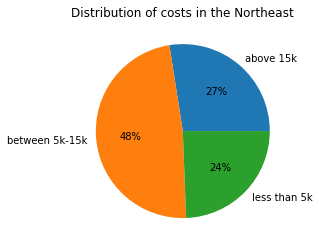

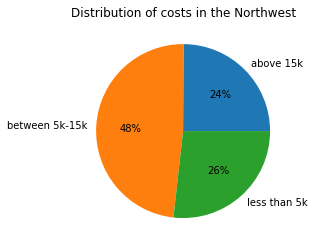

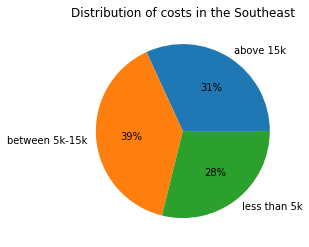

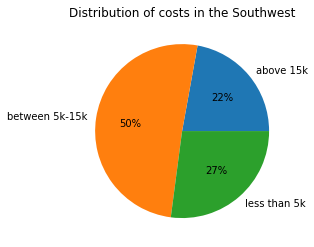

In [42]:
df.head()
region_cost_tier = df.groupby(["region", "cost tier"]).charges.count().reset_index()\
                    .pivot(columns = "cost tier", index = "region", values = "charges").reset_index()
print(region_cost_tier)
tier_names = ["above 15k", "between 5k-15k", "less than 5k"]
plot_region = lambda plot_region: plt.pie(region_cost_tier.loc[region_cost_tier["region"] == plot_region,\
              tier_names].values.tolist()[0], labels = tier_names, autopct="%d%%")
plot_region("northeast")
plt.title("Distribution of costs in the Northeast")
plt.show()
plot_region("northwest")
plt.title("Distribution of costs in the Northwest")
plt.show()
plot_region("southeast")
plt.title("Distribution of costs in the Southeast")
plt.show()
plot_region("southwest")
plt.title("Distribution of costs in the Southwest")
plt.show()

Is this difference statistically significant? I will perform an ANOVA test to figure it out.

In [20]:
def perform_anova_test(*args):
    pval = f_oneway(*args)[1]
    print("There is a {:.2%} probability that these groups belong to a population with the same average.".format(pval))
    print("The difference is {maybe}statistically significant.".format(maybe = "" if pval < 0.05 else "not "))
    return pval

perform_anova_test(costs_southwest, costs_southeast, costs_northwest, costs_northeast)

There is a 3.09% probability that these groups belong to a population with the same average.
The difference is statistically significant.


0.0308933560705201

Since the ANOVA test has detected a statistically significant difference, I will also perform a Tukey's range test to determine which pairings in particular present such difference.

In [21]:
groups = np.concatenate([costs_southwest, costs_southeast, costs_northwest, costs_northeast])
labels = ["Southwest Costs"] * len(costs_southwest) + ["Southeast Costs"] * len(costs_southeast) + \
         ["Northwest Costs"] * len(costs_northwest) + ["Northeast Costs"] * len(costs_northeast)
tukey_location_costs = pairwise_tukeyhsd(groups, labels, 0.05)
print(tukey_location_costs)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
     group1          group2      meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------------------
Northeast Costs Northwest Costs  -988.8091 0.7002 -3428.9473  1451.329  False
Northeast Costs Southeast Costs  1329.0269 0.4754 -1044.9543 3703.0081  False
Northeast Costs Southwest Costs -1059.4471 0.6584 -3499.5853  1380.691  False
Northwest Costs Southeast Costs  2317.8361 0.0583    -54.212 4689.8842  False
Northwest Costs Southwest Costs    -70.638    0.9 -2508.8955 2367.6195  False
Southeast Costs Southwest Costs -2388.4741 0.0477 -4760.5221   -16.426   True
-----------------------------------------------------------------------------


It looks like there are no statistically significant differences in any of these pairings, with the exception of SE and SW (where the P-value is 0.047). As a reminder, the average costs for the SE amount to \\$12,346.93; those in the SW amount to \\$14,735.41. The difference is visible in the histogram below.

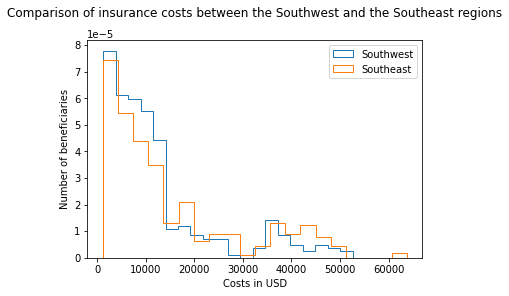

In [55]:
plt.hist(costs_southwest, histtype="step", bins=20, density=True)
plt.hist(costs_southeast, histtype="step", bins=20, density=True)
# plt.hist(costs_northwest, histtype="step", bins=20, density=True)
# plt.hist(costs_northeast, histtype="step", bins=20, density=True)
plt.legend(["Southwest", "Southeast"])
plt.xlabel("Costs in USD")
plt.ylabel("Number of beneficiaries")
plt.title("Comparison of insurance costs between the Southwest and the Southeast regions", y=1.08)
plt.show()

What could be the reason for this difference? Let us consider the same factors we have taken into account for the gender analysis: age, BMI, percentage of smokers, number of children.

In [51]:
age_southwest = df[df["region"] == "southwest"]["age"]
age_northeast = df[df["region"] == "northeast"]["age"]
age_southeast = df[df["region"] == "southeast"]["age"]
age_northwest = df[df["region"] == "northwest"]["age"]

print("\n**Age distribution for the SW region in the dataset**\n", essential_array_analysis(age_southwest))
print("\n**Age distribution for the NE region in the dataset**\n", essential_array_analysis(age_northeast))
print("\n**Age distribution for the SE region in the dataset**\n", essential_array_analysis(age_southeast))
print("\n**Age distribution for the NW region in the dataset**\n", essential_array_analysis(age_northwest))

perform_anova_test(age_southwest, age_southeast, age_northwest, age_northeast)


**Age distribution for the SW region in the dataset**
 
        The mean of this array is 39.45538461538462.
        This is the five-number summary for this array:
            - sample minimum: 19,
            - first quartile: 27.0,
            - median: 39.0,
            - third quartile: 51.0,
            - sample maximum: 64.
        The interquartile range for this array is 24.0.
        The standard deviation is 13.93839225657769.
        The variance is 194.27877869822487.
        

**Age distribution for the NE region in the dataset**
 
        The mean of this array is 39.26851851851852.
        This is the five-number summary for this array:
            - sample minimum: 18,
            - first quartile: 27.0,
            - median: 39.5,
            - third quartile: 51.0,
            - sample maximum: 64.
        The interquartile range for this array is 24.0.
        The standard deviation is 14.047278951930895.
        The variance is 197.32604595336076.
        

**Age 

0.970989069987742

The age distribution for these four groups seems to be the same. What about the BMI?

In [53]:
bmi_southwest = df[df["region"] == "southwest"]["bmi"]
bmi_northeast = df[df["region"] == "northeast"]["bmi"]
bmi_southeast = df[df["region"] == "southeast"]["bmi"]
bmi_northwest = df[df["region"] == "northwest"]["bmi"]

print("\n**BMI values for the SW region in the dataset**\n", essential_array_analysis(bmi_southwest))
print("\n**BMI values for the NE region in the dataset**\n", essential_array_analysis(bmi_northeast))
print("\n**BMI values for the SE region in the dataset**\n", essential_array_analysis(bmi_southeast))
print("\n**BMI values for the NW region in the dataset**\n", essential_array_analysis(bmi_northwest))

anova_bmi_region = perform_anova_test(bmi_southwest, bmi_southeast, bmi_northwest, bmi_northeast)


**BMI values for the SW region in the dataset**
 
        The mean of this array is 30.59661538461538.
        This is the five-number summary for this array:
            - sample minimum: 17.4,
            - first quartile: 26.9,
            - median: 30.3,
            - third quartile: 34.6,
            - sample maximum: 47.6.
        The interquartile range for this array is 7.700000000000003.
        The standard deviation is 5.683072375159565.
        The variance is 32.29731162130177.
        

**BMI values for the NE region in the dataset**
 
        The mean of this array is 29.173503086419753.
        This is the five-number summary for this array:
            - sample minimum: 15.96,
            - first quartile: 24.86625,
            - median: 28.88,
            - third quartile: 32.89375,
            - sample maximum: 48.07.
        The interquartile range for this array is 8.027499999999996.
        The standard deviation is 5.92834339408056.
        The variance is 35.14

There seem to be huge differences in the distributions of BMI values between these regions! A Tukey's range test will help us determine which differences in particular should be deemed significant.

In [54]:
groups = np.concatenate([bmi_southwest, bmi_southeast, bmi_northwest, bmi_northeast])
labels = ["BMIs in the Southwest"] * len(bmi_southwest) + ["BMIs in the Southeast"] * len(bmi_southeast) + \
         ["BMIs in the Northwest"] * len(bmi_northwest) + ["BMIs in the Northeast"] * len(bmi_northeast)
tukey_location_costs = pairwise_tukeyhsd(groups, labels, 0.05)
print(tukey_location_costs)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------
BMIs in the Northeast BMIs in the Northwest   0.0263    0.9 -1.1552  1.2078  False
BMIs in the Northeast BMIs in the Southeast   4.1825  0.001   3.033   5.332   True
BMIs in the Northeast BMIs in the Southwest   1.4231 0.0107  0.2416  2.6046   True
BMIs in the Northwest BMIs in the Southeast   4.1562  0.001  3.0077  5.3047   True
BMIs in the Northwest BMIs in the Southwest   1.3968 0.0127  0.2162  2.5774   True
BMIs in the Southeast BMIs in the Southwest  -2.7594  0.001 -3.9079 -1.6108   True
----------------------------------------------------------------------------------


According to this test, all these pairings present statistically significant differences, with the single exception of NE and NW.

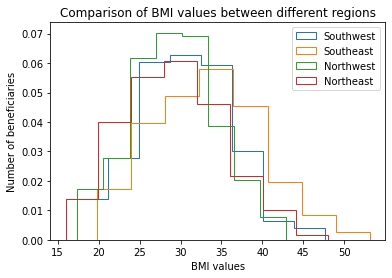

In [59]:
plt.hist(bmi_southwest, histtype="step", bins=8, density=True)
plt.hist(bmi_southeast, histtype="step", bins=8, density=True)
plt.hist(bmi_northwest, histtype="step", bins=8, density=True)
plt.hist(bmi_northeast, histtype="step", bins=8, density=True)
plt.legend(["Southwest", "Southeast", "Northwest", "Northeast"])
plt.xlabel("BMI values")
plt.ylabel("Number of beneficiaries")
plt.title("Comparison of BMI values between different regions")
plt.show()

I will display these differences using the BMI categories that I prepared earlier.

bmi category     region  normal  obese  overweight  underweight
0             northeast    73.0  143.0        98.0         10.0
1             northwest    63.0  148.0       107.0          7.0
2             southeast    41.0  243.0        80.0          0.0
3             southwest    48.0  173.0       101.0          3.0


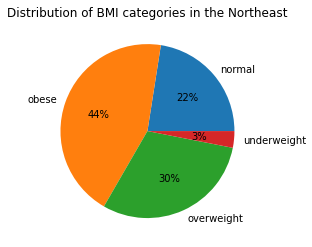

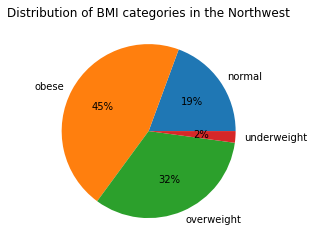

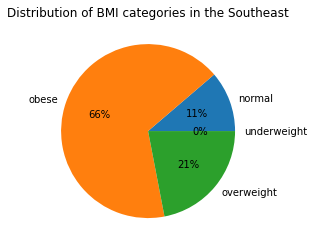

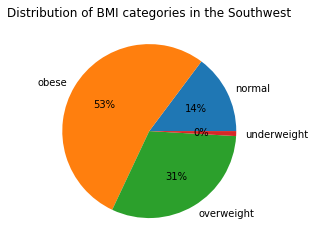

In [78]:
region_bmi_categories = df.groupby(["region", "bmi category"]).charges.count().reset_index()\
                    .pivot(columns = "bmi category", index = "region", values = "charges").reset_index().fillna(0)
print(region_bmi_categories)

category_names = ["normal", "obese", "overweight", "underweight"]
plot_region_bmi = lambda plot_region: plt.pie(region_bmi_categories.loc[region_bmi_categories["region"] == plot_region,\
              category_names].values.tolist()[0], labels = category_names, autopct="%d%%")
plot_region_bmi("northeast")
plt.title("Distribution of BMI categories in the Northeast")
plt.show()
plot_region_bmi("northwest")
plt.title("Distribution of BMI categories in the Northwest")
plt.show()
plot_region_bmi("southeast")
plt.title("Distribution of BMI categories in the Southeast")
plt.show()
plot_region_bmi("southwest")
plt.title("Distribution of BMI categories in the Southwest")
plt.show()

The differences between these distributions might justify the different costs by region. What about the percentages of smokers vs. non smokers in these areas?

smoker     region   no  yes
0       northeast  257   67
1       northwest  267   58
2       southeast  273   91
3       southwest  267   58


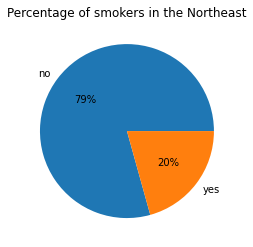

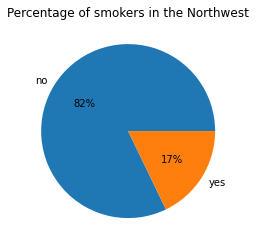

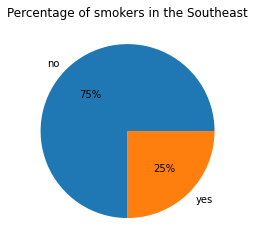

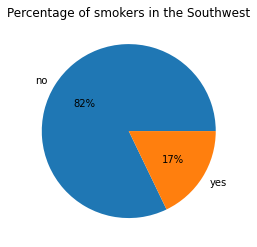

In [81]:
region_smokers = df.groupby(["region", "smoker"]).charges.count().reset_index()\
                    .pivot(columns = "smoker", index = "region", values = "charges").reset_index().fillna(0)
print(region_smokers)

smoker_labels = ["no", "yes"]
plot_region_smokers = lambda plot_region_smokers: plt.pie(region_smokers.loc[region_smokers["region"] == plot_region_smokers,\
              smoker_labels].values.tolist()[0], labels = smoker_labels, autopct="%d%%")
plot_region_smokers("northeast")
plt.title("Percentage of smokers in the Northeast")
plt.show()
plot_region_smokers("northwest")
plt.title("Percentage of smokers in the Northwest")
plt.show()
plot_region_smokers("southeast")
plt.title("Percentage of smokers in the Southeast")
plt.show()
plot_region_smokers("southwest")
plt.title("Percentage of smokers in the Southwest")
plt.show()